In [170]:
from os import listdir
from os.path import isfile, join
filepath = 'lava_results/1215_kl/' # remmeber the last baklash
filepath_nokl = 'lava_results/1215_nokl/'
files = [filepath + f for f in listdir(filepath) if isfile(join(filepath, f))]
files_nokl = [filepath_nokl + f for f in listdir(filepath_nokl) if isfile(join(filepath_nokl, f))]

In [171]:
import re

def get_reward(file):
    try:
        collector = []
        with open(file,'r') as f:
            for line in f:
                if ' | F:mu sigma m M ' in line:
                    s = line.index('rR:mu sigma m M ') + len('rR:mu sigma m M ')
                    e = line.index(' | F:mu sigma m M ')
                    collector.append(list(map(lambda x: float(x), line[s:e].split())))
        reward_mean = list(map(lambda x: x[0], collector))
        return reward_mean
    except:
        return None

In [172]:
rewards = list(map(lambda x: get_reward(x), files))

good_rewards = [i for i in rewards if i is not None]


In [173]:
rewards_nokl = list(map(lambda x: get_reward(x), files_nokl))

good_rewards_nokl = [i for i in rewards_nokl if i is not None]


In [174]:
assert len(files) == len(good_rewards)

In [175]:
assert len(files_nokl) == len(good_rewards_nokl)

In [176]:
klweights = list(map(lambda x: getKLweight(x), files))

In [177]:
def getKLweight(file):

    temp = file.split('_KLweight')

    temp = temp[1].split('_seed')

    kl_weight = float(temp[0])

    return kl_weight
    

In [178]:
import numpy as np

max_len = np.max(list(map(lambda x: len(x), good_rewards + good_rewards_nokl)))

In [179]:
for rs in good_rewards:
    rs += [rs[-1]] * (max_len - len(rs))

In [180]:
for rs in good_rewards_nokl:
    rs += [rs[-1]] * (max_len - len(rs))

In [181]:
all_kl_weights = list(set(klweights))

In [182]:
from copy import copy

In [183]:
plot_dict = {}
for kl in all_kl_weights:
    kl_idx = [i for i, x in enumerate(klweights) if x == kl]
    data = [good_rewards[i] for i in kl_idx]
    data = np.array(data)
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    plot_dict[kl] = (copy(data_mean), copy(data_std))

In [184]:
plot_dict['None'] = (np.mean(np.array(good_rewards_nokl), axis = 0), np.std(np.array(good_rewards_nokl), axis = 0))

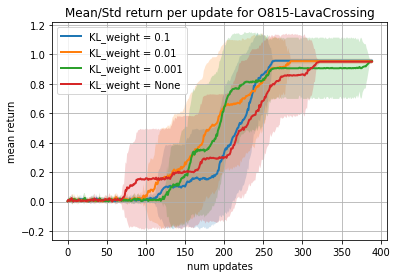

In [185]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

# plot it!
t = list(range(max_len))
fig, ax = plt.subplots(1)
for kl in plot_dict:
    mu = plot_dict[kl][0]
    sigma = plot_dict[kl][1]
    ax.plot(t, mu, lw=2, label='KL_weight = {}'.format(kl))
    ax.fill_between(t, mu+sigma, mu-sigma, alpha=0.2)

    
    
ax.set_title(r'Mean/Std return per update for O815-LavaCrossing')
ax.legend(loc='upper left')
ax.set_xlabel('num updates')
ax.set_ylabel('mean return')
ax.grid()